# < 3Ï£ºÏ∞® Í≥ºÏ†ú 1 : MLP ÎßàÏùåÎåÄÎ°ú Îã§Î§ÑÎ≥¥Í∏∞>
- datasetÏùÑ ÏûÑÏùòÎ°ú ÏÑ†Ï†ïÌï¥ÏÑú ÏßÅÏ†ë Î∂ÑÏÑù Ìï¥Î≥¥Í∏∞(Ï†úÍ≥µÌïú ÏΩîÎìúÎ•º ÌôúÏö©Ìï¥ÏÑú Ìï¥Î≥¥Í∏∞)
- activation functions Ï§ë reluÏÇ¨Ïö©Ïãú Ìï®Ïàò ÏßÅÏ†ë Ï†ïÏùò
- lr, optimizer Îì± Î∞îÍøîÎ≥¥Í∏∞
- hidden layer/neuron ÏàòÎ•º Î∞îÍæ∏Í∏∞
- Ï†ÑÏ≤òÎ¶¨ÎèÑ Ï∂îÍ∞Ä
- Î™®Îì† ÏãúÎèÑÎ•º Ïò¨Î†§Ï£ºÏÑ∏Ïöî!
- Ï†úÏùº ÎÜíÏùÄ accÎ•º Î≥¥Ïù∏ ÏãúÎèÑÎ•º Î™ÖÏãúÌï¥Ï£ºÏÑ∏Ïöî!


In [6]:
import torch
from torch import nn, optim
from sklearn.datasets import load_breast_cancer
from torch.utils.data import  TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# torch.nn: Ïã†Í≤ΩÎßùÏùÑ Íµ¨Ï∂ïÌïòÍ∏∞ ÏúÑÌïú Îã§ÏñëÌïú Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ÎÇò Î†àÏù¥Ïñ¥ Îì±Ïù¥ Ï†ïÏùò
# torch.optim: ÌôïÎ•†Ï†Å Í≤ΩÏÇ¨ ÌïòÍ∞ïÎ≤ï(Stochastic Gradient Descent, SGD)Î•º Ï§ëÏã¨ÏúºÎ°ú Ìïú ÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî ÏïåÍ≥†Î¶¨Ï¶òÏù¥ Íµ¨ÌòÑ
# torch.utils.data: SGDÏùò Î∞òÎ≥µ Ïó∞ÏÇ∞ÏùÑ Ïã§ÌñâÌï† Îïå ÏÇ¨Ïö©ÌïòÎäî ÎØ∏Îãà Î∞∞ÏπòÏö© Ïú†Ìã∏Î¶¨Ìã∞ Ìï®ÏàòÍ∞Ä Ìè¨Ìï®
# sklearn.model.data: ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÏúÑÌïú ÌïôÏäµÏö©/ÌÖåÏä§Ìä∏Ïö© Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨, Í∑∏Î¶¨Îìú ÏÑúÏπòÎ°ú ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞ Ï∂îÏ∂ú Îì±Ïùò API Ï†úÍ≥µ
# sklearn.metrics: Î∂ÑÎ•ò, ÌöåÍ∑Ä, ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏóê ÎåÄÌïú Îã§ÏñëÌïú ÏÑ±Îä• Ï∏°Ï†ï Î∞©Î≤ï Ï†úÍ≥µ(Accuracy, Precision, ROC-AUC RMSE Îì±)
# sklearn.preprocessing: Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Ïóê ÌïÑÏöîÌïú Îã§ÏñëÌïú Í∞ÄÍ≥µ Í∏∞Îä• Ï†úÍ≥µ

## ÏïÑÎûò Îç∞Ïù¥ÌÑ∞ÏÖã Ï§ë ÏõêÌïòÎäî Îç∞Ïù¥ÌÑ∞ÏÖã ÌïòÎÇòÎ•º ÏÑ†ÌÉùÌïòÏó¨, ÏΩîÎìú Í≥ºÏ†ú ÏßÑÌñâÌïòÍ∏∞!
- 1) load_digits() <br>
- 2) load_wine()

1. ÌôúÏÑ±Ìï®Ïàò Î∞îÍæ∏Í∏∞
2. lr Î∞îÍæ∏Í∏∞
3. optimizer Î∞îÍæ∏Í∏∞
4. momentum Î∞îÍøîÎ≥¥Í∏∞
5. => ÏúÑÏùò ÏãúÎèÑ Í∏∞Î°ù

# 1.1 Load_wine
### activation function: ```sigmoid ```
### Optimizer: ```adam```,
### lr: 0.01

modelÏùò outputÏùÄ :  [0.99148977 0.00349057 0.00501973]
argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ 0
accuracyÎäî 0.8333333333333334

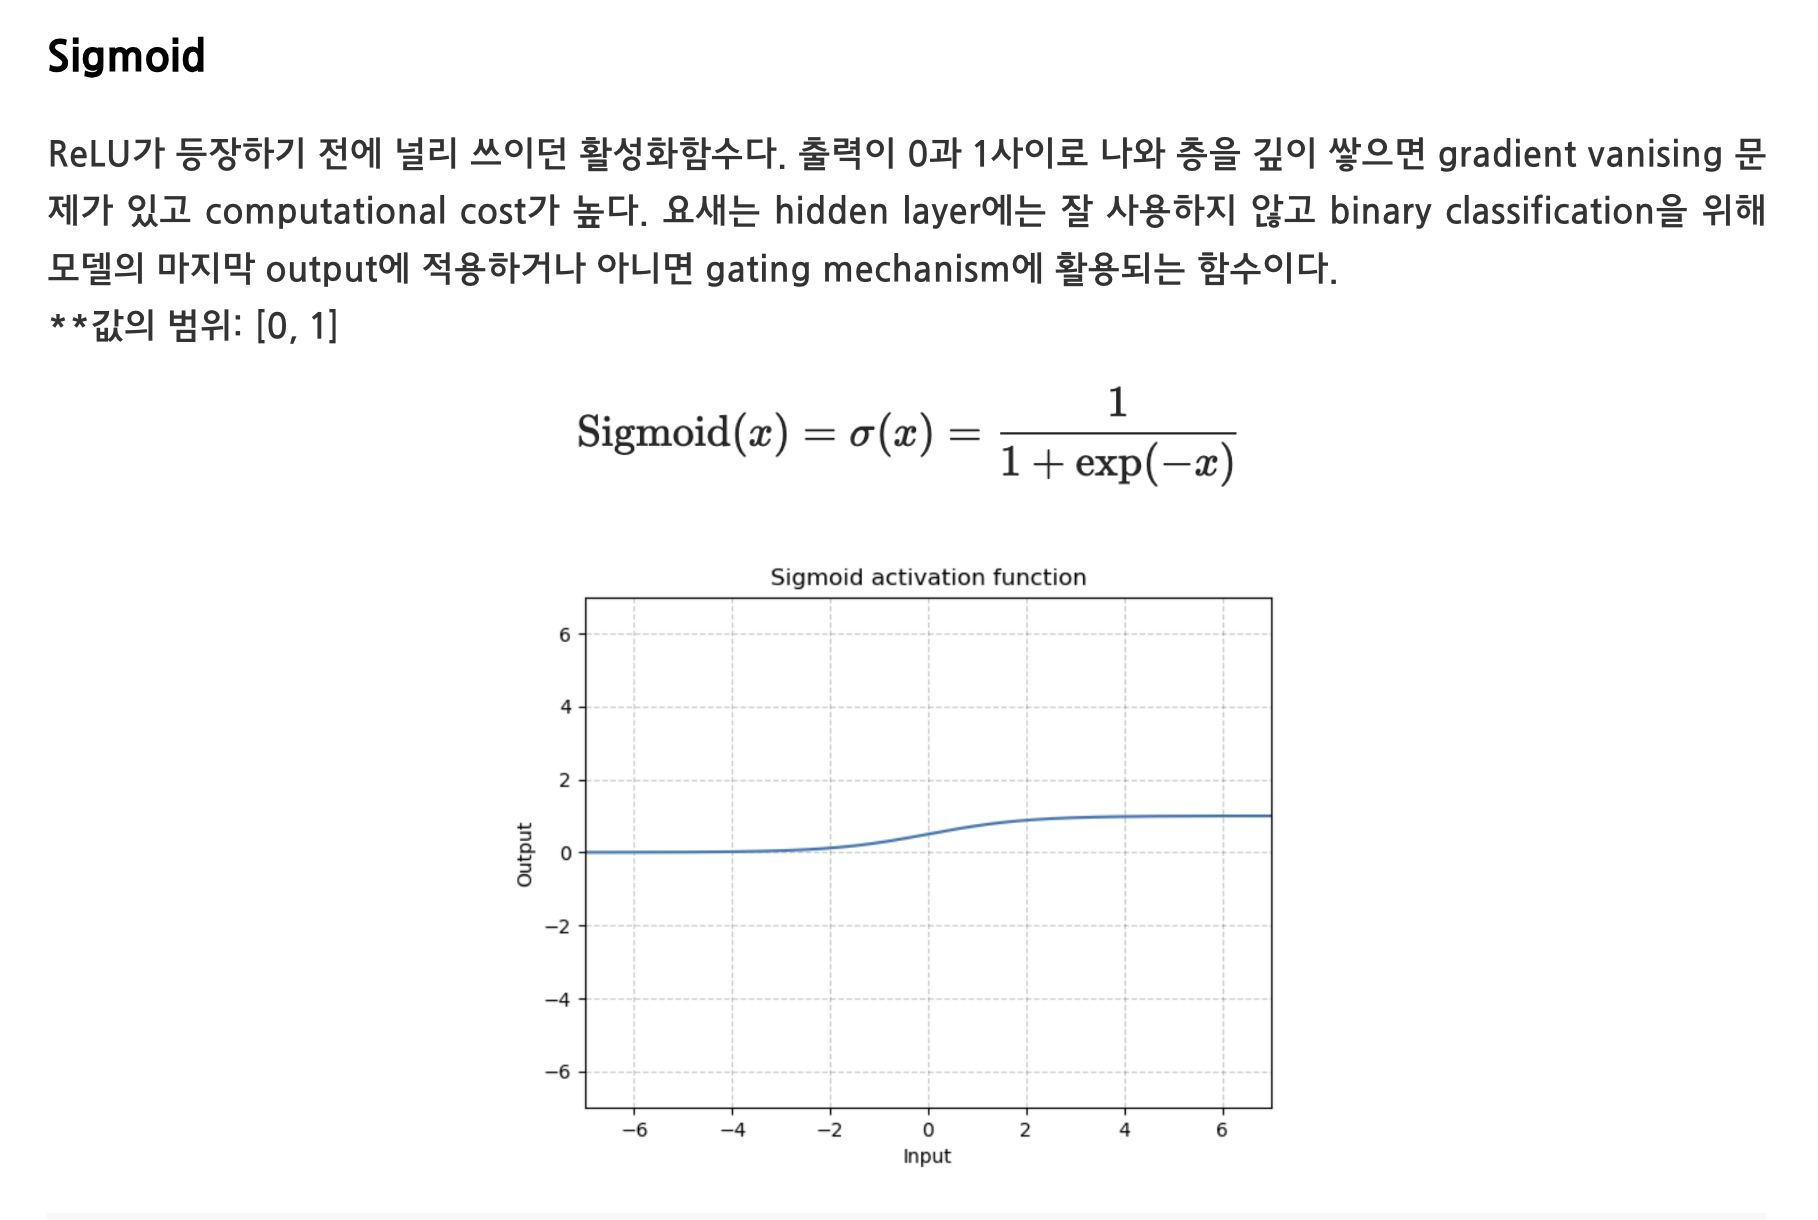

In [1]:
from sklearn.datasets import load_wine

data = load_wine()
# Îç∞Ïù¥ÌÑ∞ÏÖã Ï¢ÖÎ•ò :
#data = load_breast_cancer()

In [2]:
input = data.data
output = data.target

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' #GPUÍ∞Ä Í∞ÄÎä•ÌïòÎ©¥ GPUÏóê ÏóÖÎ°úÎìú

torch.manual_seed(777)
if device == "cuda":
  torch.cuda.manual_seed_all(777)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.3, random_state = 42, stratify= data.target, shuffle = True)
# stratify: target Í∞íÏúºÎ°ú ÏßÄÏ†ïÌï¥ÏÑú target class ÎπÑÏú®ÏùÑ Ïú†ÏßÄÌïú Ï±Ñ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÎÇòÎàî

x_train = torch.FloatTensor(x_train).to(device) # FloatTensor: 32-bit floating-point
y_train = torch.LongTensor(y_train).to(device) # LongTensor: 64-bit integer
x_test = torch.FloatTensor(x_test)
y_test = torch.LongTensor(y_test)

# Îç∞Ïù¥ÌÑ∞Î•º tensorÎ°ú Î∞îÍøîÏ£ºÍ≥† gpu Ïó∞ÏÇ∞Ïù¥ Í∞ÄÎä•Ìï¥ÏßÄÎèÑÎ°ù gpuÏóê ÏòÆÍπÄ
# label Í∞íÏùÑ Ïôú long Ïóê ÏòÆÍ≤®ÎÜìÎäîÍ∞Ä? loss functionÏù¥ Îã§Î•¥Í∏∞ ÎïåÎ¨∏

In [9]:
input

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [10]:
print(x_train[0])
print(y_train[0])
# input 13Í∞ú (ÏÜçÏÑ±Ïù¥ 13Í∞ú)
# yÏùò classÎäî 3Í∞ú
list(data.target_names)

tensor([1.3750e+01, 1.7300e+00, 2.4100e+00, 1.6000e+01, 8.9000e+01, 2.6000e+00,
        2.7600e+00, 2.9000e-01, 1.8100e+00, 5.6000e+00, 1.1500e+00, 2.9000e+00,
        1.3200e+03], device='cuda:0')
tensor(0, device='cuda:0')


['class_0', 'class_1', 'class_2']

ÌååÏù¥ÌÜ†ÏπòÏóêÏÑúÎäî Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ï¢Ä Îçî ÏâΩÍ≤å Îã§Î£∞ Ïàò ÏûàÎèÑÎ°ù Ïú†Ïö©Ìïú ÎèÑÍµ¨Î°úÏÑú torch.utils.data.DatasetÍ≥º torch.utils.data.DataLoaderÎ•º Ï†úÍ≥µÌï©ÎãàÎã§. Ïù¥Î•º ÏÇ¨Ïö©ÌïòÎ©¥ ÎØ∏Îãà Î∞∞Ïπò ÌïôÏäµ, Îç∞Ïù¥ÌÑ∞ ÏÖîÌîå(shuffle), Î≥ëÎ†¨ Ï≤òÎ¶¨ÍπåÏßÄ Í∞ÑÎã®Ìûà ÏàòÌñâÌï† Ïàò ÏûàÏäµÎãàÎã§. Í∏∞Î≥∏Ï†ÅÏù∏ ÏÇ¨Ïö© Î∞©Î≤ïÏùÄ DatasetÏùÑ Ï†ïÏùòÌïòÍ≥†, Ïù¥Î•º DataLoaderÏóê Ï†ÑÎã¨ÌïòÎäî Í≤É
- init : class ÏóêÏÑú Í∞ùÏ≤¥Í∞Ä ÏÉùÏÑ±ÎêòÎ©¥ Î∞îÎ°ú Ïã§ÌñâÎêòÎäî Ìï®Ïàò
- len : observation ÏàòÎ•º Ï†ïÏùòÌïòÎäî Ìï®Ïàò
- getitem : iteration ÎßàÎã§ Ìï¥ÎãπÌïòÎäî Îç∞Ïù¥ÌÑ∞Î•º ÎèåÎ†§Ï£ºÎäî Ìï®Ïàò

In [11]:
from torch.utils.data import Dataset
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = x_train
    self.y_data = [[y] for y in y_train]
#  Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ï†ÑÏ≤òÎ¶¨Î•º Ìï¥Ï£ºÎäî Î∂ÄÎ∂Ñ

  def __len__(self):
    return len(self.x_data)
#  Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Í∏∏Ïù¥. Ï¶â, Ï¥ù ÏÉòÌîåÏùò ÏàòÎ•º Ï†ÅÏñ¥Ï£ºÎäî Î∂ÄÎ∂Ñ

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx]).to(device)
    y = torch.LongTensor(self.y_data[idx]).to(device)
#  Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú ÌäπÏ†ï 1Í∞úÏùò ÏÉòÌîåÏùÑ Í∞ÄÏ†∏Ïò§Îäî Ìï®Ïàò

    return x,y

In [12]:
batch_size = 8

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=batch_size)

In [13]:
model = nn.Sequential(
          nn.Linear(13,213, bias=True), #input ÏÜçÏÑ±Ïù¥ 13Í∞ú
          nn.Sigmoid(),
          nn.Linear(213,32, bias=True),
          nn.Sigmoid(),
          nn.Linear(32,10, bias=True),
          nn.Sigmoid(),
          nn.Linear(10,3, bias=True), #output ÌÅ¥ÎûòÏä§Îäî 3Í∞ú
          nn.Softmax() # dimension = 1, Ìñâ(sample)Î≥ÑÎ°ú Í≥ÑÏÇ∞ -> ÏùºÎ∞òÏ†ÅÏúºÎ°ú Î∂ÑÎ•ò / default: dimension = none ÎßàÏßÄÎßâ ÌÖêÏÑú / 0, Ïó¥(feature)Î≥ÑÎ°ú Í≥ÑÏÇ∞
          ).to(device)

classÎ°ú Íµ¨ÌòÑ Í∞ÄÎä•
- init : Ï¥àÍ∏∞ ÏÉùÏÑ± Ìï®Ïàò
- foward : ÏàúÏ†ÑÌåå(ÏûÖÎ†•Í∞í => ÏòàÏ∏°Í∞í Ïùò Í≥ºÏ†ï)

In [14]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(13,213, bias=True), # input_layer = 13, hidden_layer1 = 213 -> Ïñ¥Îñ§ ÏàòÍ∞Ä ÏµúÏ†ÅÏùºÍπå
          nn.Sigmoid(),
        nn.BatchNorm1d(213)
    )
  # activation function Ïù¥Ïö©
  #   nn.ReLU()
  #   nn.tanH()
  #   https://pytorch.org/docs/stable/nn.html Í∑∏ Ïô∏ÏóêÎèÑ Ïó¨Í∏∞ÏÑú ÌôïÏù∏ Í∞ÄÎä•Ìï®
  #   ÌååÎùºÎØ∏ÌÑ∞Í∞Ä ÌïÑÏöîÌïòÏßÄ ÏïäÎã§Îäî Í≤ÉÏù¥ ÌäπÏßï

  # batch normazliation 1d, ÌååÎùºÎØ∏ÌÑ∞ Í∞íÏúºÎ°ú vectorÏùò Í∏∏Ïù¥Î•º Ï†ÑÌï¥Ï§å
  # Ï∂îÌõÑÏóê Ïù¥ÎØ∏ÏßÄÎ•º Îã§Î£®Í≤å ÎêúÎã§Î©¥, Í∑∏ÎïåÎäî batch normalization 2dÎ•º Ïù¥Ïö©ÌïòÍ≤å Îê®
  # Í∑∏ÎïåÎäî ÌååÎùºÎØ∏ÌÑ∞ Í∞íÏúºÎ°ú Ï±ÑÎÑê, Í∞ÄÎ°ú, ÏÑ∏Î°ú Í∏∏Ïù¥Î•º Ï†ÑÎã¨Ìï¥Ï£ºÍ≤å Îê®

    self.layer2 = nn.Sequential(
          nn.Linear(213,32, bias=True), # hidden_layer1 = 213, hidden_layer2 = 32
        nn.Sigmoid()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(32,10, bias=True), # hidden_layer2 = 32, hidden_layer3 = 10
        nn.Sigmoid()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(10, 3, bias=True), # hidden_layer3 = 10, output_layer = 3
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [15]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

        # xavierÏÇ¨Ïö©
        # LayerÏùò weightÎ•º Ïñ¥Îñ§ Î∂ÑÌè¨Î•º Í∞ÄÏßÄÎèÑÎ°ù Ï¥àÍ∏∞ÌôîÏãúÏºúÏ§å+global minimumÏ∞æÍ∏∞ ÏúÑÌï¥ÏÑú
        # import torch.nn.init as init Î°ú Î™®ÎìàÏùÑ Î®ºÏ†Ä Î∂àÎü¨Ïò§Í∏∞ÎèÑ

In [16]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-15-33764106f641>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=213, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(213, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=213, out_features=32, bias=True)
    (1): Sigmoid()
  )
  (layer3): Sequential(
    (0): Linear(in_features=32, out_features=10, bias=True)
    (1): Sigmoid()
  )
  (layer4): Sequential(
    (0): Linear(in_features=10, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)

In [17]:
print(model)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=213, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(213, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=213, out_features=32, bias=True)
    (1): Sigmoid()
  )
  (layer3): Sequential(
    (0): Linear(in_features=32, out_features=10, bias=True)
    (1): Sigmoid()
  )
  (layer4): Sequential(
    (0): Linear(in_features=10, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)


In [18]:
loss_fn  = nn.CrossEntropyLoss().to(device)

# Ïó¨Îü¨Í∞ÄÏßÄ optimizer ÏãúÎèÑÌï¥Î≥¥Í∏∞
# lr Î∞îÍøîÎ≥¥Í∏∞

optimizer = optim.Adam(model.parameters(), lr= 0.01)

# https://pytorch.org/docs/stable/optim.html#module-torch.optim ÌéòÏù¥ÏßÄ Ï∞∏Ï°∞
# optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# sgd Îì±Îì±

In [19]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # ÎπÑÏö© Ìï®Ïàò
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


0 1.109588384628296
10 0.949062168598175
20 0.8707650303840637
30 0.8127037882804871
40 0.7222650051116943
50 0.6537120342254639
60 0.6438564658164978
70 0.6005004644393921
80 0.5916985869407654
90 0.5807543396949768


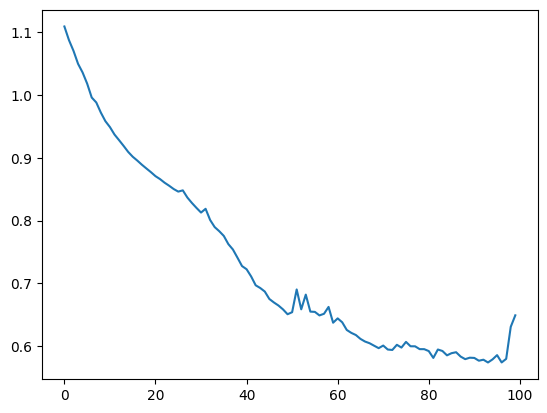

In [20]:
plt.plot(losses)
plt.show()

In [21]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [22]:
print(f'modelÏùò outputÏùÄ :  {y_pred[0]}')
print(f'argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ {predicted[0]}')
print(f'accuracyÎäî {accuracy}')

modelÏùò outputÏùÄ :  [0.99148977 0.00349057 0.00501973]
argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ 0
accuracyÎäî 0.8333333333333334


# 1.2.1 Load_wine
### activation function: ```reLU ```
### Optimizer: ```adam```,
### lr: 0.01

modelÏùò outputÏùÄ :  [9.9999821e-01 5.8700961e-11 1.8138147e-06]
argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ 0
***accuracyÎäî 0.9259259259259259(ÌôúÏÑ±Ìôî Ìï®Ïàò Ï§ë ÏµúÍ≥†)***

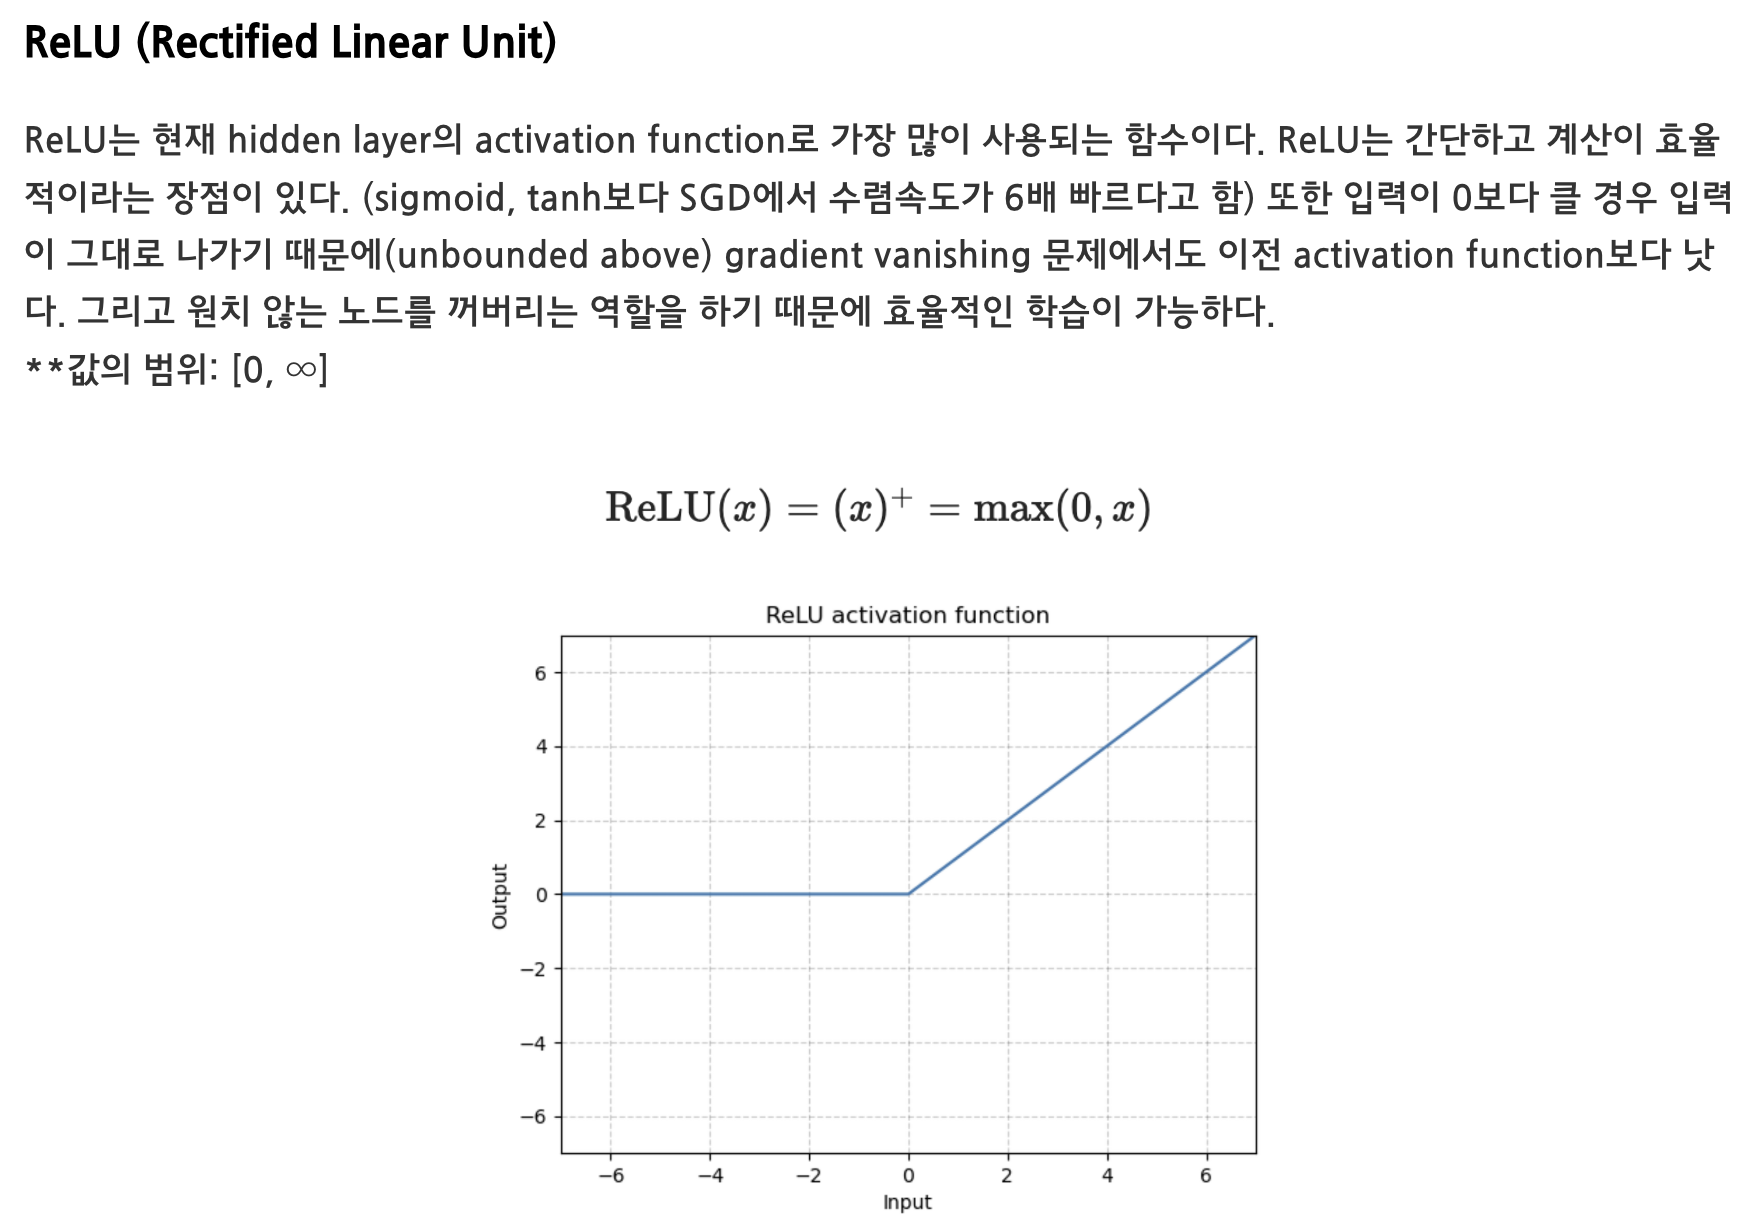

In [23]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(13,213, bias=True), # input_layer = 13, hidden_layer1 = 213 -> Ïñ¥Îñ§ ÏàòÍ∞Ä ÏµúÏ†ÅÏùºÍπå
          nn.ReLU(),
        nn.BatchNorm1d(213)
    )
    self.layer2 = nn.Sequential(
          nn.Linear(213,32, bias=True), # hidden_layer1 = 213, hidden_layer2 = 32
        nn.ReLU()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(32,10, bias=True), # hidden_layer2 = 32, hidden_layer3 = 10
        nn.ReLU()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(10, 3, bias=True), # hidden_layer3 = 10, output_layer = 3
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [24]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

In [25]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-24-6dcf2c5a1d5c>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=213, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(213, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=213, out_features=32, bias=True)
    (1): ReLU()
  )
  (layer3): Sequential(
    (0): Linear(in_features=32, out_features=10, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=10, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)

In [26]:
loss_fn  = nn.CrossEntropyLoss().to(device)

optimizer = optim.Adam(model.parameters(), lr= 0.01)

In [27]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # ÎπÑÏö© Ìï®Ïàò
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


0 1.0081623792648315
10 0.7423608899116516
20 0.6336838006973267
30 0.6024340391159058
40 0.5981121063232422
50 0.5910658836364746
60 0.5829037427902222
70 0.5816807150840759
80 0.5752645134925842
90 0.5750989317893982


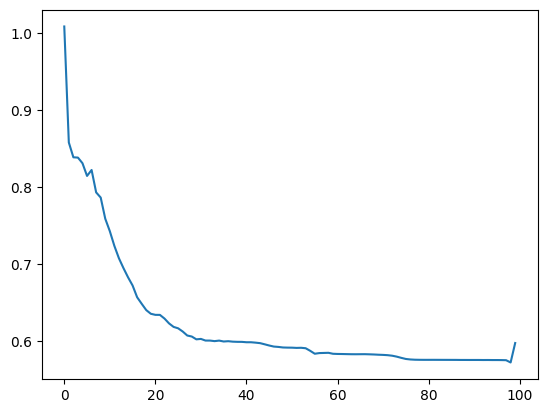

In [28]:
plt.plot(losses)
plt.show()

In [29]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [30]:
print(f'modelÏùò outputÏùÄ :  {y_pred[0]}')
print(f'argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ {predicted[0]}')
print(f'accuracyÎäî {accuracy}')

modelÏùò outputÏùÄ :  [9.9999821e-01 5.8700961e-11 1.8138147e-06]
argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ 0
accuracyÎäî 0.9259259259259259


# 1.2.2 Load_wine
### activation function: ```reLU ```
### Optimizer: ```sgd```,
### lr: 0.01

modelÏùò outputÏùÄ :  [9.9999797e-01 7.8278424e-09 2.0149812e-06]
argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ 0
**accuracyÎäî 0.6481481481481481**

In [42]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(13,213, bias=True), # input_layer = 13, hidden_layer1 = 213 -> Ïñ¥Îñ§ ÏàòÍ∞Ä ÏµúÏ†ÅÏùºÍπå
          nn.ReLU(),
        nn.BatchNorm1d(213)
    )
    self.layer2 = nn.Sequential(
          nn.Linear(213,32, bias=True), # hidden_layer1 = 213, hidden_layer2 = 32
        nn.ReLU()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(32,10, bias=True), # hidden_layer2 = 32, hidden_layer3 = 10
        nn.ReLU()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(10, 3, bias=True), # hidden_layer3 = 10, output_layer = 3
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [43]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

In [44]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-43-6dcf2c5a1d5c>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=213, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(213, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=213, out_features=32, bias=True)
    (1): ReLU()
  )
  (layer3): Sequential(
    (0): Linear(in_features=32, out_features=10, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=10, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)

In [45]:
loss_fn  = nn.CrossEntropyLoss().to(device)

optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# sgdÏóêÎã§Í∞Ä Ïù¥Ï†ÑÏùò Ïù¥ÎèôÍ∞íÏùÑ Í≥†Î†§ÌïòÎèÑÎ°ù ÏÑ§Í≥ÑÌïòÏó¨ momentum. Ï¶â Í¥ÄÏÑ±ÏùÑ Ï§ÄÎã§. ÌòπÏó¨ local minÏóê ÎèÑÎã¨ÌïòÎçîÎùºÎèÑ ÏïûÏúºÎ°ú ÎÇòÏïÑÍ∞ÄÏÑú local minÏùÑ ÌÉàÏ∂úÌï† Ïàò ÏûàÎèÑÎ°ù ÏÑ§Ï†ïÌï¥Ï§ÄÎã§.
# momentumÍ∞íÏùÄ 0.9ÏóêÏÑú ÏãúÏûëÌïòÎ©∞, 0.95, 0.99Î°ú Ï¶ùÍ∞ÄÏãúÌÇ§Î©∞ ÏÇ¨Ïö©! ** defaultÎäî 0

In [46]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # ÎπÑÏö© Ìï®Ïàò
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

0 1.1210331916809082
10 0.8412902355194092
20 0.8282655477523804
30 0.8113690614700317
40 0.7935861945152283
50 0.7889648675918579
60 0.7611711025238037
70 0.7659488320350647
80 0.767164945602417
90 0.7953329682350159


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


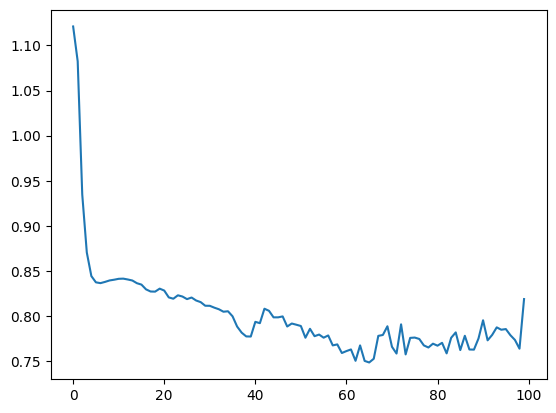

In [47]:
plt.plot(losses)
plt.show()

In [48]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [49]:
print(f'modelÏùò outputÏùÄ :  {y_pred[0]}')
print(f'argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ {predicted[0]}')
print(f'accuracyÎäî {accuracy}')

modelÏùò outputÏùÄ :  [9.9999797e-01 7.8278424e-09 2.0149812e-06]
argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ 0
accuracyÎäî 0.6481481481481481


# 1.2.3 Load_wine(Best Accuracy)
### activation function: ```reLU ```
### Optimizer: ```adam```,
### lr: 0.005

modelÏùò outputÏùÄ :  [9.999981e-01 1.891155e-06 3.106505e-09]
argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ 0
***ü•áaccuracyÎäî 0.9629629629629629ü•á***

In [58]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(13,213, bias=True), # input_layer = 13, hidden_layer1 = 213 -> Ïñ¥Îñ§ ÏàòÍ∞Ä ÏµúÏ†ÅÏùºÍπå
          nn.ReLU(),
        nn.BatchNorm1d(213)
    )
    self.layer2 = nn.Sequential(
          nn.Linear(213,32, bias=True), # hidden_layer1 = 213, hidden_layer2 = 32
        nn.ReLU()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(32,10, bias=True), # hidden_layer2 = 32, hidden_layer3 = 10
        nn.ReLU()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(10, 3, bias=True), # hidden_layer3 = 10, output_layer = 3
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [59]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

In [60]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-59-6dcf2c5a1d5c>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=213, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(213, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=213, out_features=32, bias=True)
    (1): ReLU()
  )
  (layer3): Sequential(
    (0): Linear(in_features=32, out_features=10, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=10, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)

In [61]:
loss_fn  = nn.CrossEntropyLoss().to(device)

optimizer = optim.Adam(model.parameters(), lr= 0.005)

In [62]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # ÎπÑÏö© Ìï®Ïàò
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

0 1.1206010580062866
10 0.7287671566009521
20 0.6256992816925049
30 0.5995254516601562
40 0.5874199867248535
50 0.5819535255432129
60 0.576002299785614
70 0.5656735897064209
80 0.5539038777351379
90 0.5519042015075684


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


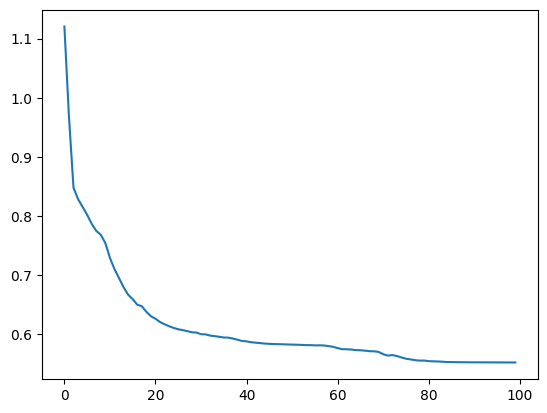

In [63]:
plt.plot(losses)
plt.show()

In [64]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [65]:
print(f'modelÏùò outputÏùÄ :  {y_pred[0]}')
print(f'argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ {predicted[0]}')
print(f'accuracyÎäî {accuracy}')

modelÏùò outputÏùÄ :  [9.999981e-01 1.891155e-06 3.106505e-09]
argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ 0
accuracyÎäî 0.9629629629629629


# 1.2.4 Load_wine
### activation function: ```reLU ```
### Optimizer: ```adam```,
### lr: 0.001

modelÏùò outputÏùÄ :  [9.9798346e-01 5.6963792e-04 1.4468451e-03]
argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ 0
**accuracyÎäî 0.9444444444444444**

In [66]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(13,213, bias=True), # input_layer = 13, hidden_layer1 = 213 -> Ïñ¥Îñ§ ÏàòÍ∞Ä ÏµúÏ†ÅÏùºÍπå
          nn.ReLU(),
        nn.BatchNorm1d(213)
    )
    self.layer2 = nn.Sequential(
          nn.Linear(213,32, bias=True), # hidden_layer1 = 213, hidden_layer2 = 32
        nn.ReLU()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(32,10, bias=True), # hidden_layer2 = 32, hidden_layer3 = 10
        nn.ReLU()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(10, 3, bias=True), # hidden_layer3 = 10, output_layer = 3
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [67]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

In [68]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-67-6dcf2c5a1d5c>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=213, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(213, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=213, out_features=32, bias=True)
    (1): ReLU()
  )
  (layer3): Sequential(
    (0): Linear(in_features=32, out_features=10, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=10, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)

In [69]:
loss_fn  = nn.CrossEntropyLoss().to(device)

optimizer = optim.Adam(model.parameters(), lr= 0.001)

In [70]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # ÎπÑÏö© Ìï®Ïàò
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

0 1.1086326837539673
10 0.8736345767974854
20 0.8231661915779114
30 0.7939985990524292
40 0.7680807709693909
50 0.7268308997154236
60 0.6782670021057129
70 0.6393131613731384
80 0.6138721108436584
90 0.6011010408401489


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


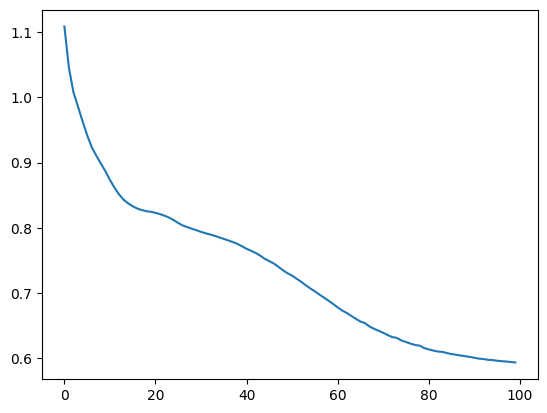

In [71]:
plt.plot(losses)
plt.show()

In [72]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [73]:
print(f'modelÏùò outputÏùÄ :  {y_pred[0]}')
print(f'argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ {predicted[0]}')
print(f'accuracyÎäî {accuracy}')

modelÏùò outputÏùÄ :  [9.9798346e-01 5.6963792e-04 1.4468451e-03]
argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ 0
accuracyÎäî 0.9444444444444444


# 1.2.5 Load_wine
### activation function: ```reLU ```
### Optimizer: ```adam```,
### lr: 0.005
### one less layer

modelÏùò outputÏùÄ :  [9.9998569e-01 8.5055772e-06 5.7836182e-06]
argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ 0
**accuracyÎäî 0.9629629629629629(
  layer ÌïòÎÇò Ï§ÑÏù¥ÎãàÍπå output Í∞íÏùÄ Îã§Î•¥ÏßÄÎßå accuracy ÎèôÏùº)**

In [82]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(13,213, bias=True), # input_layer = 13, hidden_layer1 = 213 -> Ïñ¥Îñ§ ÏàòÍ∞Ä ÏµúÏ†ÅÏùºÍπå
          nn.ReLU(),
        nn.BatchNorm1d(213)
    )
    self.layer2 = nn.Sequential(
          nn.Linear(213,50, bias=True), # hidden_layer1 = 213, hidden_layer2 = 32
        nn.ReLU()
    )
    self.layer3 = nn.Sequential(
        nn.Linear(50, 3, bias=True), # hidden_layer3 = 32, output_layer = 3
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    return output

In [83]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

In [84]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-83-6dcf2c5a1d5c>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=213, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(213, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=213, out_features=50, bias=True)
    (1): ReLU()
  )
  (layer3): Sequential(
    (0): Linear(in_features=50, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)

In [85]:
loss_fn  = nn.CrossEntropyLoss().to(device)

optimizer = optim.Adam(model.parameters(), lr= 0.005)

In [86]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # ÎπÑÏö© Ìï®Ïàò
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

0 1.184717059135437
10 0.8109003901481628
20 0.6626495122909546
30 0.6063769459724426
40 0.5944021940231323
50 0.5889822840690613
60 0.5723241567611694
70 0.5608019828796387
80 0.5544771552085876
90 0.5525878667831421


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


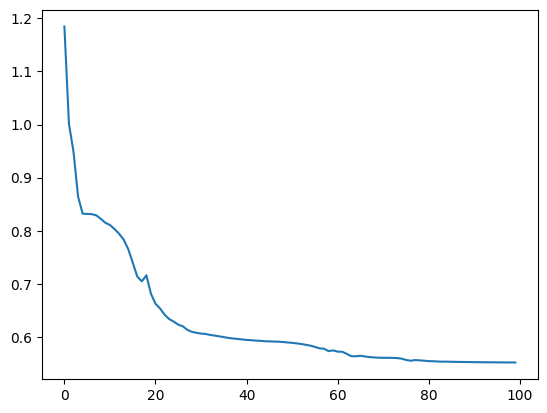

In [87]:
plt.plot(losses)
plt.show()

In [88]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [89]:
print(f'modelÏùò outputÏùÄ :  {y_pred[0]}')
print(f'argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ {predicted[0]}')
print(f'accuracyÎäî {accuracy}')

modelÏùò outputÏùÄ :  [9.9998569e-01 8.5055772e-06 5.7836182e-06]
argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ 0
accuracyÎäî 0.9629629629629629


# 1.3 Load_wine
### activation function: ```Tanh```
### Optimizer: ```adam```,
### lr: 0.01

modelÏùò outputÏùÄ :  [9.9362296e-01 4.4325487e-05 6.3327332e-03]
argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ 0
**accuracyÎäî 0.7592592592592593**

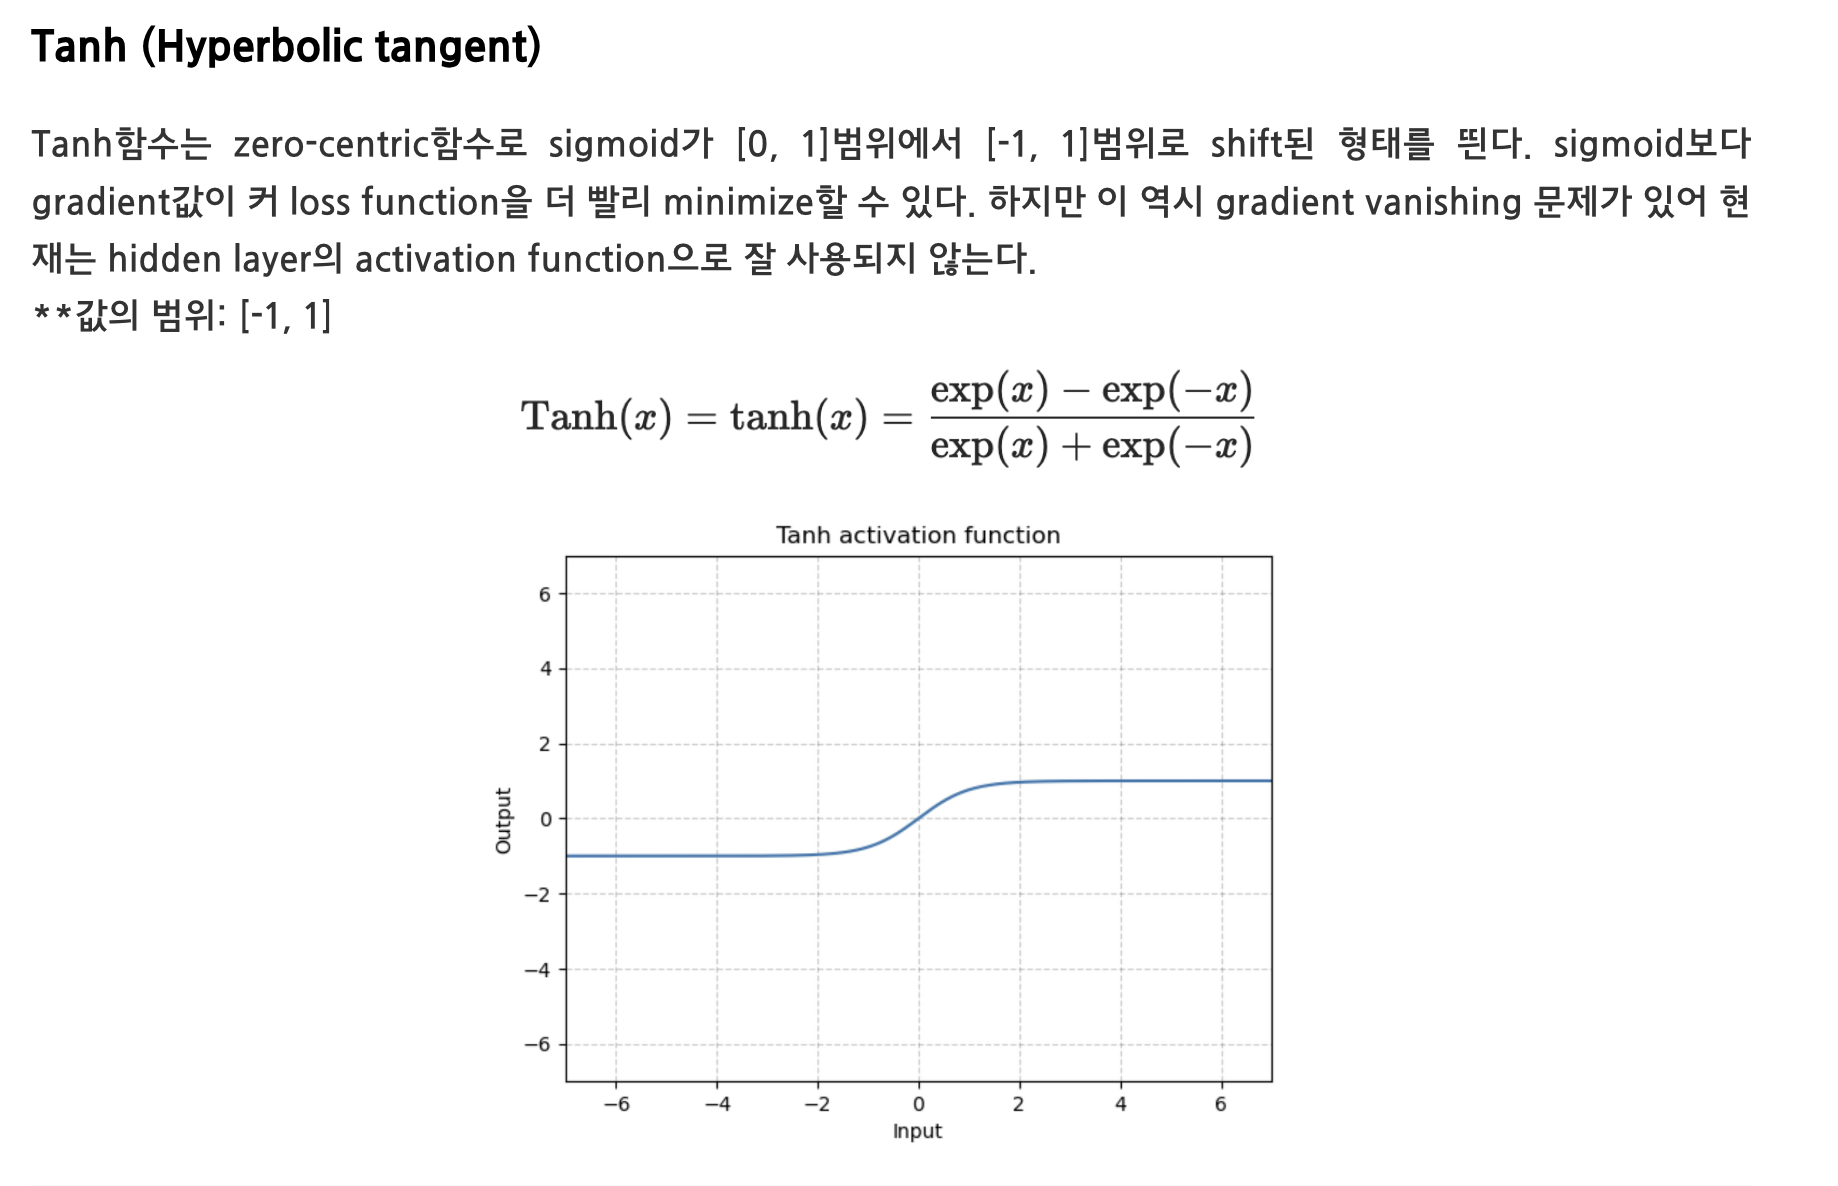

In [34]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(13,213, bias=True), # input_layer = 13, hidden_layer1 = 213 -> Ïñ¥Îñ§ ÏàòÍ∞Ä ÏµúÏ†ÅÏùºÍπå
          nn.Tanh(),
        nn.BatchNorm1d(213)
    )
    self.layer2 = nn.Sequential(
          nn.Linear(213,32, bias=True), # hidden_layer1 = 213, hidden_layer2 = 32
        nn.Tanh()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(32,10, bias=True), # hidden_layer2 = 32, hidden_layer3 = 10
        nn.Tanh()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(10, 3, bias=True), # hidden_layer3 = 10, output_layer = 3
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [35]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

In [36]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-35-6dcf2c5a1d5c>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=213, bias=True)
    (1): Tanh()
    (2): BatchNorm1d(213, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=213, out_features=32, bias=True)
    (1): Tanh()
  )
  (layer3): Sequential(
    (0): Linear(in_features=32, out_features=10, bias=True)
    (1): Tanh()
  )
  (layer4): Sequential(
    (0): Linear(in_features=10, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)

In [37]:
loss_fn  = nn.CrossEntropyLoss().to(device)

optimizer = optim.Adam(model.parameters(), lr= 0.01)

In [38]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # ÎπÑÏö© Ìï®Ïàò
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

0 1.1688932180404663
10 0.8457913994789124
20 0.7836636900901794
30 0.712549090385437
40 0.6304113268852234
50 0.6305526494979858
60 0.6238176226615906
70 0.6204167604446411
80 0.6221071481704712
90 0.6213273406028748


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


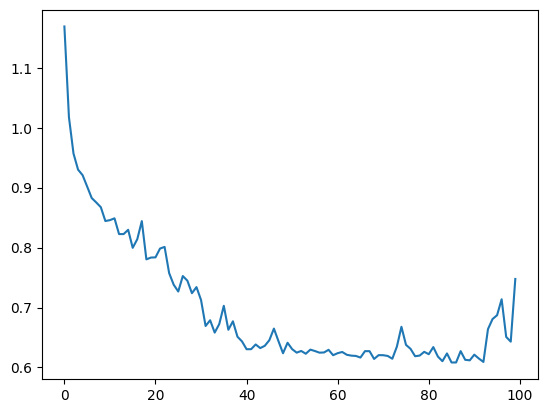

In [39]:
plt.plot(losses)
plt.show()

In [40]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [41]:
print(f'modelÏùò outputÏùÄ :  {y_pred[0]}')
print(f'argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ {predicted[0]}')
print(f'accuracyÎäî {accuracy}')

modelÏùò outputÏùÄ :  [9.9362296e-01 4.4325487e-05 6.3327332e-03]
argmaxÎ•º Ìïú ÌõÑÏùò outputÏùÄ 0
accuracyÎäî 0.7592592592592593


# < 3Ï£ºÏ∞® Í≥ºÏ†ú 2 : CNN ÎßõÎ≥¥Í∏∞>



In [90]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# argparse: ÌîÑÎ°úÍ∑∏Îû®Ïù¥ ÌïÑÏöîÌïú Ïù∏ÏûêÎ•º Ï†ïÏùòÌïòÎ©¥, argparse Îäî sys.argv Î•º Ïñ¥ÎñªÍ≤å ÌååÏã±Ìï†ÏßÄ ÌååÏïÖÌïúÎã§. ÎòêÌïú argparse Î™®ÎìàÏùÄ ÎèÑÏõÄÎßêÍ≥º ÏÇ¨Ïö©Î≤ï Î©îÏãúÏßÄÎ•º ÏûêÎèô ÏÉùÏÑ±ÌïòÍ≥†, ÏÇ¨Ïö©ÏûêÍ∞Ä ÌîÑÎ°úÍ∑∏Îû®Ïóê ÏûòÎ™ªÎêú Ïù∏ÏûêÎ•º Ï§Ñ Îïå ÏóêÎü¨Î•º Î∞úÏÉùÏãúÌÇ®Îã§

In [91]:
# Training settings

batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9912422/9912422 [00:00<00:00, 82870326.34it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 28881/28881 [00:00<00:00, 36257316.32it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1648877/1648877 [00:00<00:00, 20306932.53it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4542/4542 [00:00<00:00, 6633192.47it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [92]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size = 5) # Ïù¥Ï†Ñ output layerÏôÄ Ïù¥ÌõÑ input layer Í∞ôÍ≤å
    self.mp = nn.MaxPool2d(2) # maximum pooling: calculating the maximum value of the elements in the pooling window
    self.fc = nn.Linear(320 , 10) ### : RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x320<- and 300x10)
# fully connected layer with input size(320) and output size(10)

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.mp(self.conv1(x))) # (28-4)/2 = 12
    x = F.relu(self.mp(self.conv2(x))) # (12-4)/2 = 4
    x = x.view(in_size, -1) # flatten the tensor # 4 * 4 * 20 = 320
    x = self.fc(x)
    return F.log_softmax(x)

In [93]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

In [94]:
def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    ## torch.nn.functional.nll_loss: cross-entrophy ÏÜêÏã§Ìï®Ïàò
    ## torch.nn.functional.nll_loss(input, target, weight=None, size_average=None, ignore_index=-100, reduce=None, reduction='mean')
    ## NLLLossÎßå Ï†ÅÏö©Ìïú Î™®Îç∏ÏùÄ Î™®Îç∏ ÎßàÏßÄÎßâ Î†àÏù¥Ïñ¥Ïóê SoftmaxÍ∞Ä ÏûàÏùå <-> CrossEntropyLoss ÏïàÏóêÎäî LogSoftmax+NLLLossÍ∞Ä Ìï®Íªò ÏÇ¨Ïö©
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))

In [95]:
def test():
    model.eval()  # model.eval(): Î™®Îç∏ÏùÑ ÌèâÍ∞Ä Î™®ÎìúÎ°ú Ï†ÑÌôòÌïòÎäî Î©îÏÑúÎìú
                  # ÎìúÎ°≠ÏïÑÏõÉÏù¥ ÎπÑÌôúÏÑ±ÌôîÎêòÍ≥† Î∞∞Ïπò Ï†ïÍ∑úÌôîÏùò Ïù¥Îèô ÌèâÍ∑†Í≥º Ïù¥Îèô Î∂ÑÏÇ∞Ïù¥ ÏóÖÎç∞Ïù¥Ìä∏ÎêòÏßÄ ÏïäÏùå
                  # Ï£ºÎ°ú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÎÇò Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ ÌèâÍ∞ÄÌï† Îïå ÏÇ¨Ïö©. ÌèâÍ∞Ä Î™®ÎìúÏóêÏÑúÎäî Î™®Îç∏Ïù¥ Ï∂îÎ°† ÏãúÏóê ÎèôÏùºÌïú ÎèôÏûëÏùÑ ÏàòÌñâÌïòÎèÑÎ°ù ÏÑ§Ï†ïÎêòÏñ¥ ÏûàÏñ¥, Î™®Îç∏Ïùò ÏÑ±Îä• ÌèâÍ∞ÄÏóê Î∂àÌïÑÏöîÌïú ÎÖ∏Ïù¥Ï¶àÎ•º Ï§ÑÏù¥Í≥† ÏùºÍ¥ÄÎêú Í≤∞Í≥ºÎ•º ÏñªÏùÑ Ïàò ÏûàÎã§
                  # Î™®Îç∏ÏùÑ ÌïôÏäµ(training)ÌïòÎäî ÎèôÏïà ÏÇ¨Ïö©Ìïú Î™®Îç∏ Í∞ùÏ≤¥Î•º Ï∂îÎ°†(inference)Ìï† Îïå model.eval()ÏùÑ Ìò∏Ï∂úÌïòÏó¨ Ï∂îÎ°† Î™®ÎìúÎ°ú Ï†ÑÌôòÌïòÍ≥†, Ï∂îÎ°†Ïù¥ ÎÅùÎÇú ÌõÑÏóêÎäî Îã§Ïãú model.train()ÏùÑ Ìò∏Ï∂úÌïòÏó¨ ÌïôÏäµ Î™®ÎìúÎ°ú Ï†ÑÌôòÌïòÎäî Í≤å ÏùºÎ∞òÏ†Å
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy lossÏôÄÏùò Í¥ÄÍ≥Ñ ÌôïÏù∏!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [96]:
for epoch in range(1, 10):
    train(epoch)
    test()

<ipython-input-92-c5bb30d7a25f>:16: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.298560
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.305966
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.287377
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.269854
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.267215
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.258240
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.245630
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.227109
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.197367
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.152327
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.116389
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.929139
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.841930
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.722983
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.312610
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.259503
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.253619
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.900110
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.813843
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.756022
Train Epoch: 1 [12800/60000 (

<ipython-input-95-575113da3938>:9: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.1794, Accuracy: 9480/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.142421
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.216596
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.064347
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.195459
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.191720
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.255969
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.146505
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.124041
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.134168
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.274293
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.074709
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.305869
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.217962
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.161752
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.182464
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.216057
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.188984
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.252308
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.111742
Train Epoch: 2 [12